### Вычисление корреляций между голосованием депутатов

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Загрузка основного датафрейма с результатами голосований
df_full = pd.read_csv('./data/df_full_cr.csv', index_col=0)

In [3]:
df_full.head(3)

,law_name,vote_result,Авдеев Александр Александрович,Адучиев Батор Канурович,Азимов Рахим Азизбоевич,Аксаков Анатолий Геннадьевич,Алексеева Татьяна Олеговна,Альшевских Андрей Геннадьевич,Ананских Игорь Александрович,Аникеев Григорий Викторович,...,Эмиргамзаев Абдулгамид Гасанович,Юмашева Инга Альбертовна,Юрков Дмитрий Васильевич,Ющенко Александр Андреевич,Ямпольская Елена Александровна,Яровая Ирина Анатольевна,Курдюмов Александр Борисович,Антошкин Николай Тимофеевич,Кобзев Юрий Викторович,Шурчанов Валентин Сергеевич
114772,(за основу) О проекте порядка работы Государст...,принят,-1,-1,-1,2,-1,-1,2,-1,...,2,2,-1,-1,-1,-1,2,2,2,2
114771,Регистрация,принят,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
114770,(первое чтение) О проекте федерального закона ...,отклонен,2,2,2,2,2,2,2,2,...,2,2,2,-1,2,2,2,2,2,2


2 - не голосовал, 1 - "против", 0 - воздержался, -1 - "за"

In [4]:
# Загрузка таблицы со списком депутатов и их партий
dep_df_cr = pd.read_csv('./data/dep_df_cr.csv', index_col=0, squeeze=True)
dep_df_cr.head(3)

Авдеев Александр Александрович    ЕР
Адучиев Батор Канурович           ЕР
Азимов Рахим Азизбоевич           ЕР
Name: 0, dtype: object

# Корреляция

In [5]:
# Функция построения тепловой карты корреляций
def corr_func(df, annot=True, figsize=(15,10)):
    corr = df.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    plt.figure(figsize=figsize)
    sns.heatmap(corr, mask=mask, annot=annot, fmt='.2f')
    #plt.savefig('3.png', bbox_inches='tight')

In [6]:
# Функция подсчёта итогов голосования
def vote_result(row):
    v_sum = 0
    for v in row:
        if np.abs(v) == 1:
            v_sum += v
    return v_sum

# Функция замены голоса отсутствующего депутата на "голос партии"
def votes_olny(row):
    for i, v in enumerate(row):
        if v == 2:
            row[i] = row['party_result']
    return row

### Создание датафреймов для каждой партии и вычисление коэффициента корреляции Пирсона между всеми депутатами в партии

#### Справедливая Россия

In [7]:
df = {}

# Создаём отдельный датафрейм для партии
df['СР'] = df_full.loc[:, dep_df_cr[dep_df_cr == 'СР'].index]

# Для каждого голосования определяем общий результат для партии
df['СР']['party_result'] = df['СР'].apply(vote_result, axis='columns').map(lambda x: int(abs(x)/x) if x != 0 else 0)

# Меняем все значение "2" (не голосовал) на 'party_result'
df['СР'].apply(votes_olny, axis='columns')

df['СР'].head(3)

,Аксаков Анатолий Геннадьевич,Ананских Игорь Александрович,Белоусов Вадим Владимирович,Газзаев Валерий Георгиевич,Гартунг Валерий Карлович,Грешневиков Анатолий Николаевич,Драпеко Елена Григорьевна,Емельянов Михаил Васильевич,Крючек Сергей Иванович,Миронов Сергей Михайлович,Нилов Олег Анатольевич,Омаров Гаджимурад Заирбекович,Ремезков Александр Александрович,Рыжак Николай Иванович,Терентьев Александр Васильевич,Тумусов Федот Семёнович,Хованская Галина Петровна,Чепа Алексей Васильевич,Шеин Олег Васильевич,party_result
114772,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
114771,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
114770,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


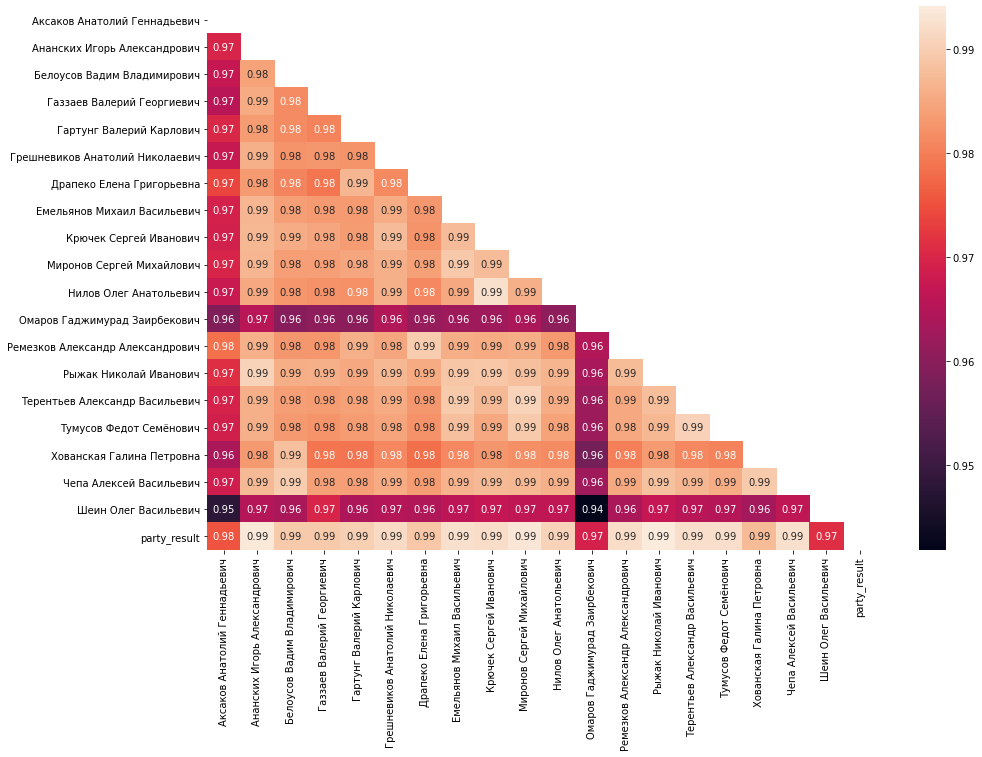

In [8]:
# Строим тепловую карту коэффициентов корреляции Пирсона
corr_func(df['СР'])

#### ЛДПР

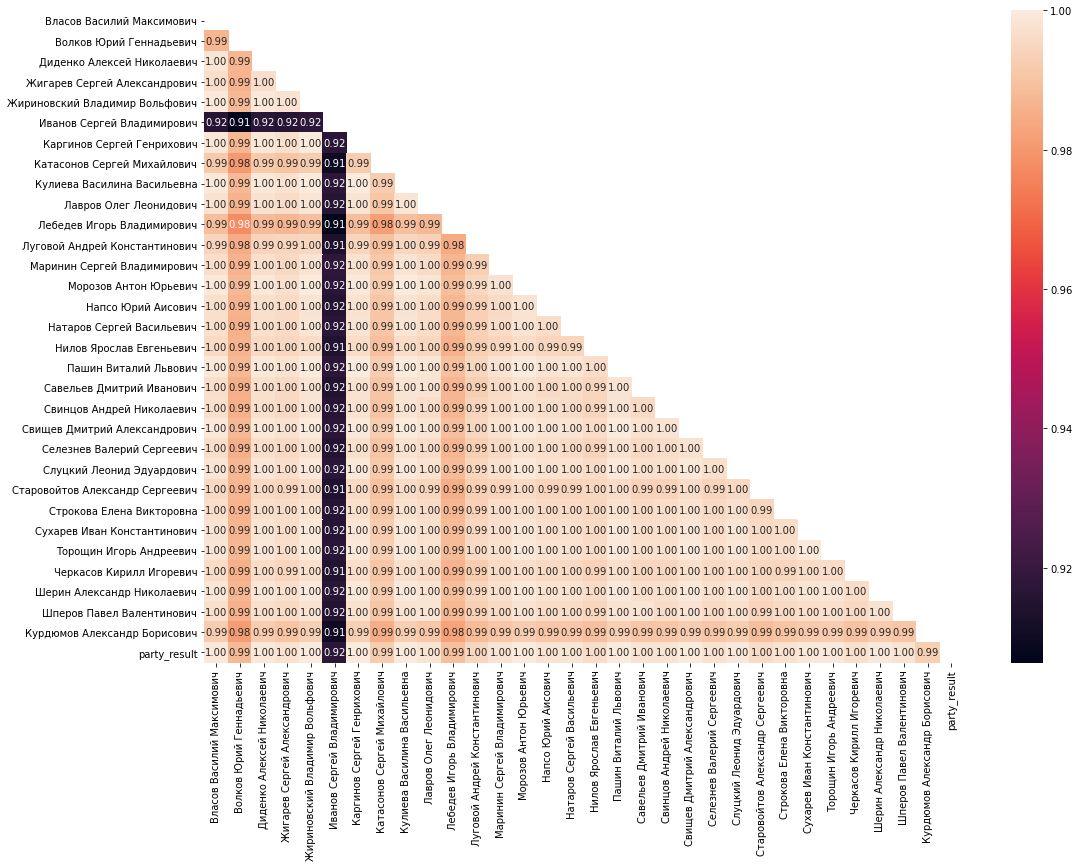

In [9]:
df['ЛДПР'] = df_full.loc[:, dep_df_cr[dep_df_cr == 'ЛДПР'].index]

df['ЛДПР']['party_result'] = df['ЛДПР'].apply(vote_result, axis='columns').map(lambda x: int(abs(x)/x) if x != 0 else 0)

df['ЛДПР'].apply(votes_olny, axis='columns')
    
corr_func(df['ЛДПР'], figsize=(17,12))

#### КПРФ

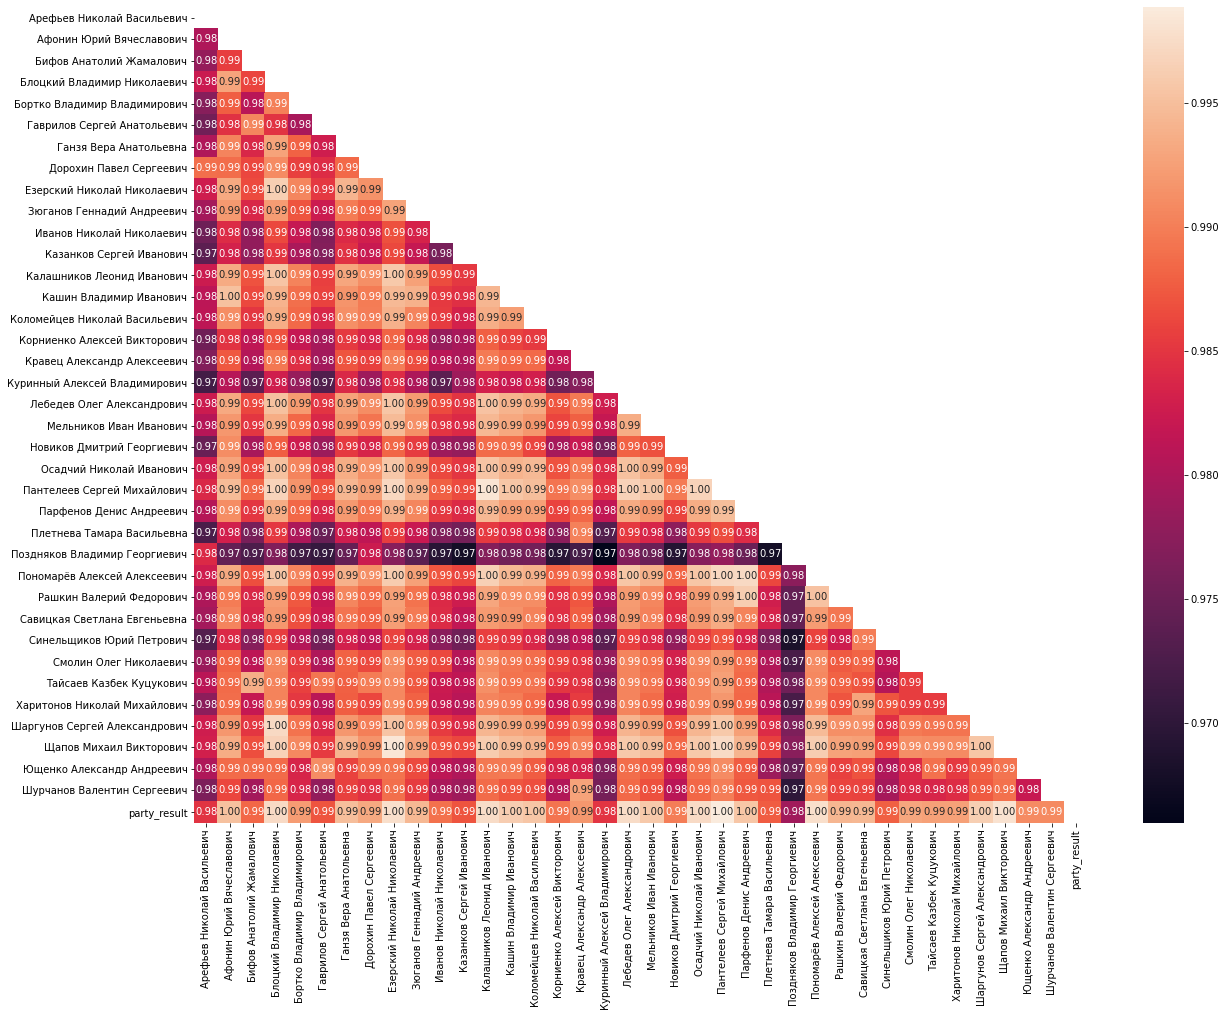

In [10]:
df['КПРФ'] = df_full.loc[:, dep_df_cr[dep_df_cr == 'КПРФ'].index]

df['КПРФ']['party_result'] = df['КПРФ'].apply(vote_result, axis='columns').map(lambda x: int(abs(x)/x) if x != 0 else 0)

df['КПРФ'].apply(votes_olny, axis='columns')
    
corr_func(df['КПРФ'], figsize=(20,15))

#### Единая Россия

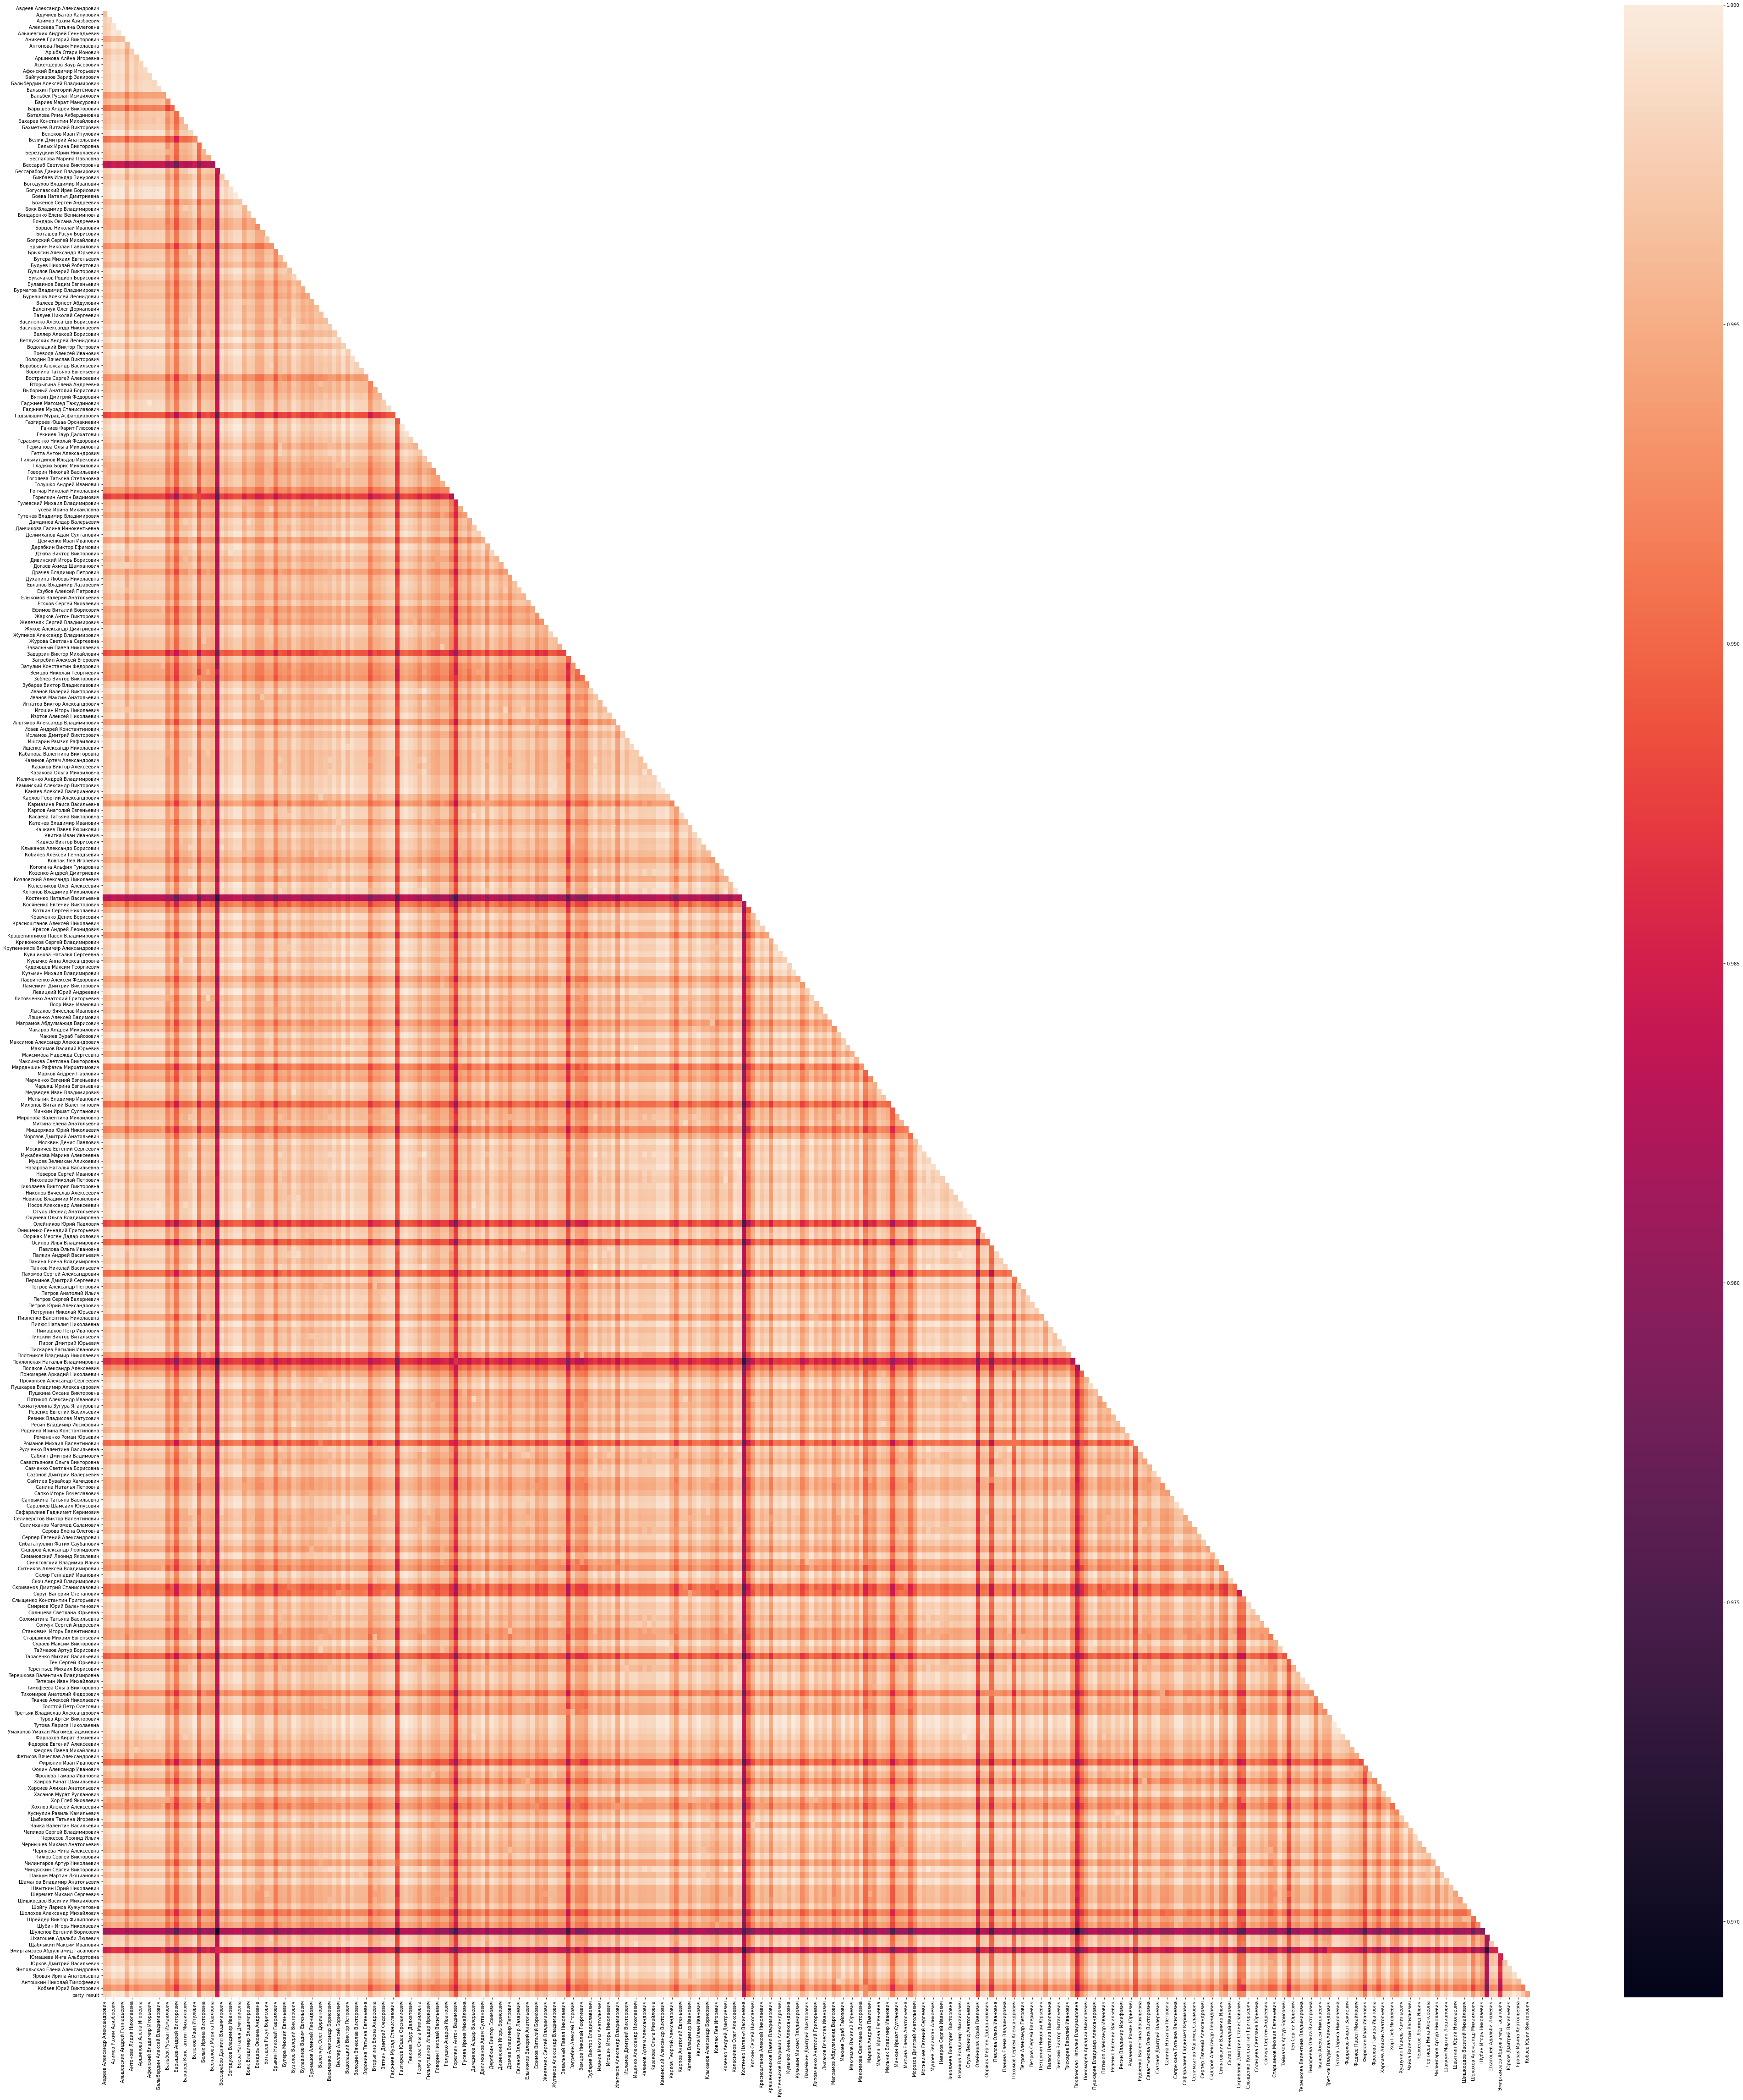

In [11]:
df['ЕР'] = df_full.loc[:, dep_df_cr[dep_df_cr == 'ЕР'].index]

df['ЕР']['party_result'] = df['ЕР'].apply(vote_result, axis='columns').map(lambda x: int(abs(x)/x) if x != 0 else 0)

df['ЕР'].apply(votes_olny, axis='columns')
    
corr_func(df['ЕР'], annot=False, figsize=(70,80))

In [12]:
# Определение попарных корреляций выше заданного threshold
def corr_feature_detect(data, threshold=0.9, feature_name='feature'):
    
    feature1 = feature_name + ' 1'
    feature2 = feature_name + ' 2'
    
    corrmat = data.corr()
    corrmat = corrmat.unstack() 
    corrmat = corrmat.sort_values(ascending=False)
    corrmat = corrmat[corrmat >= threshold]
    corrmat = corrmat[corrmat < 1] 
    corrmat = pd.DataFrame(corrmat).reset_index()
    corrmat.columns = [feature1, feature2, 'corr']
    corrmat = corrmat.drop(index=corrmat[corrmat.index % 2 == 1].index).reset_index(drop=True)
   
    return corrmat

In [13]:
corr_feature_detect(data=df['СР'].drop(columns=['party_result']), threshold=0.99, feature_name='Депутат')

,Депутат 1,Депутат 2,corr
0,Нилов Олег Анатольевич,Крючек Сергей Иванович,0.992500
1,Терентьев Александр Васильевич,Миронов Сергей Михайлович,0.990828
2,Ананских Игорь Александрович,Рыжак Николай Иванович,0.990733
3,Тумусов Федот Семёнович,Терентьев Александр Васильевич,0.990454


In [14]:
corr_feature_detect(data=df['ЛДПР'].drop(columns=['party_result']), threshold=0.99, feature_name='Депутат')

,Депутат 1,Депутат 2,corr
0,Свищев Дмитрий Александрович,Кулиева Василина Васильевна,0.999893
1,Пашин Виталий Львович,Свищев Дмитрий Александрович,0.999893
2,Жириновский Владимир Вольфович,Свищев Дмитрий Александрович,0.999893
3,Морозов Антон Юрьевич,Жириновский Владимир Вольфович,0.999785
4,Морозов Антон Юрьевич,Пашин Виталий Львович,0.999785
...,...,...,...
362,Курдюмов Александр Борисович,Жигарев Сергей Александрович,0.990401
363,Строкова Елена Викторовна,Курдюмов Александр Борисович,0.990401
364,Савельев Дмитрий Иванович,Катасонов Сергей Михайлович,0.990382
365,Селезнев Валерий Сергеевич,Катасонов Сергей Михайлович,0.990267


In [15]:
corr_feature_detect(data=df['КПРФ'].drop(columns=['party_result']), threshold=0.99, feature_name='Депутат')

,Депутат 1,Депутат 2,corr
0,Езерский Николай Николаевич,Щапов Михаил Викторович,0.998415
1,Пантелеев Сергей Михайлович,Калашников Леонид Иванович,0.998330
2,Щапов Михаил Викторович,Пантелеев Сергей Михайлович,0.997361
3,Блоцкий Владимир Николаевич,Шаргунов Сергей Александрович,0.997270
4,Парфенов Денис Андреевич,Пономарёв Алексей Алексеевич,0.997189
...,...,...,...
193,Плетнева Тамара Васильевна,Кравец Александр Алексеевич,0.990178
194,Кравец Александр Алексеевич,Щапов Михаил Викторович,0.990169
195,Савицкая Светлана Евгеньевна,Коломейцев Николай Васильевич,0.990150
196,Бортко Владимир Владимирович,Блоцкий Владимир Николаевич,0.990094


In [16]:
corr_feature_detect(data=df['ЕР'].drop(columns=['party_result']), threshold=0.99, feature_name='Депутат')

,Депутат 1,Депутат 2,corr
0,Кононов Владимир Михайлович,Панков Николай Васильевич,0.999863
1,Мукабенова Марина Алексеевна,Панков Николай Васильевич,0.999863
2,Панков Николай Васильевич,Кононов Владимир Михайлович,0.999863
3,Кононов Владимир Михайлович,Чиндяскин Сергей Викторович,0.999863
4,Иванов Валерий Викторович,Мукабенова Марина Алексеевна,0.999863
...,...,...,...
45436,Кармазина Раиса Васильевна,Шубин Игорь Николаевич,0.990003
45437,Хуснулин Равиль Камильевич,Скруг Валерий Степанович,0.990001
45438,Тарасенко Михаил Васильевич,Прокопьев Александр Сергеевич,0.990001
45439,Савченко Светлана Борисовна,Тарасенко Михаил Васильевич,0.990001


### Определение депутатов, которые всегда голосуют так же, как большинство в их партии

In [17]:
# Список партий
#p_list = ['ЕР', 'КПРФ', 'ЛДПР', 'СР']

# Вычисление результатов голосования отдельно для каждой партии
#for p in p_list:
#    df[p]['party_result'] = df[p].apply(vote_result, axis='columns').map(lambda x: int(abs(x)/x) if x != 0 else 0)

In [18]:
# Функция определения списка депутатов, голосовавших всегда так же, как большинство в их партии
def ident_deps(df_party):
    deps_party_full = list(df_party.drop(columns=['party_result']).columns.values)
    deps_party_ident = deps_party_full.copy()

    for ind in df_party.index.values:
        for d in deps_party_ident:
            vote = df_party.loc[ind, d]
            if vote != df_party.loc[ind, 'party_result'] and (vote != 0 and vote != 2):
                deps_party_ident.remove(d)
        if len(deps_party_ident) == 0:
            break
    return deps_party_ident, deps_party_full

#### Справедливая Россия

In [19]:
deps_SR_ident, deps_SR_full = ident_deps(df['СР'])

# Количество "идентичных" депутатов
len(deps_SR_ident)

0

#### ЛДПР

In [20]:
deps_LDPR_ident, deps_LDPR_full = ident_deps(df['ЛДПР'])

# Количество "идентичных" депутатов
len(deps_LDPR_ident)

5

In [21]:
# Доля "идентичных" депутатов от общего числа в партии
np.round(len(deps_LDPR_ident) / len(deps_LDPR_full), 2)

0.16

In [22]:
# Список "идентичных" депутатов
deps_LDPR_ident

['Жириновский Владимир Вольфович',
 'Кулиева Василина Васильевна',
 'Морозов Антон Юрьевич',
 'Пашин Виталий Львович',
 'Свищев Дмитрий Александрович']

#### КПРФ

In [23]:
deps_KPRF_ident, deps_KPRF_full = ident_deps(df['КПРФ'])

# Количество "идентичных" депутатов
len(deps_KPRF_ident)

0

#### Единая Россия

In [24]:
deps_ER_ident, deps_ER_full = ident_deps(df['ЕР'])

# Количество "идентичных" депутатов
len(deps_ER_ident)

59

In [25]:
# Доля "идентичных" депутатов от общего числа в партии
np.round(len(deps_ER_ident) / len(deps_ER_full), 2)

0.19

In [26]:
# Список "идентичных" депутатов
deps_ER_ident

['Азимов Рахим Азизбоевич',
 'Альшевских Андрей Геннадьевич',
 'Аскендеров Заур Асевович',
 'Балыбердин Алексей Владимирович',
 'Бикбаев Ильдар Зинурович',
 'Богуславский Ирек Борисович',
 'Боева Наталья Дмитриевна',
 'Валуев Николай Сергеевич',
 'Ветлужских Андрей Леонидович',
 'Воевода Алексей Иванович',
 'Ганиев Фарит Глюсович',
 'Делимханов Адам Султанович',
 'Дерябкин Виктор Ефимович',
 'Изотов Алексей Николаевич',
 'Ишсарин Рамзил Рафаилович',
 'Каличенко Андрей Владимирович',
 'Канаев Алексей Валерианович',
 'Карпов Анатолий Евгеньевич',
 'Колесников Олег Алексеевич',
 'Кравченко Денис Борисович',
 'Кривоносов Сергей Владимирович',
 'Кувшинова Наталья Сергеевна',
 'Кудрявцев Максим Георгиевич',
 'Левицкий Юрий Андреевич',
 'Макиев Зураб Гайозович',
 'Максимова Светлана Викторовна',
 'Москвин Денис Павлович',
 'Москвичев Евгений Сергеевич',
 'Муцоев Зелимхан Аликоевич',
 'Назарова Наталья Васильевна',
 'Никонов Вячеслав Алексеевич',
 'Огуль Леонид Анатольевич',
 'Окунева Ольга Вл

Проверка корреляции между партиями

In [27]:
p_list = ['ЕР', 'КПРФ', 'ЛДПР', 'СР']

df_p = pd.concat([df['ЕР']['party_result'], df['КПРФ']['party_result'], df['ЛДПР']['party_result'], df['СР']['party_result']], axis=1, join='inner')
df_p.columns = p_list
df_p.head()

,ЕР,КПРФ,ЛДПР,СР
114772,-1,-1,-1,-1
114771,0,0,0,0
114770,-1,-1,-1,-1
114769,-1,-1,-1,-1
114768,0,-1,-1,-1


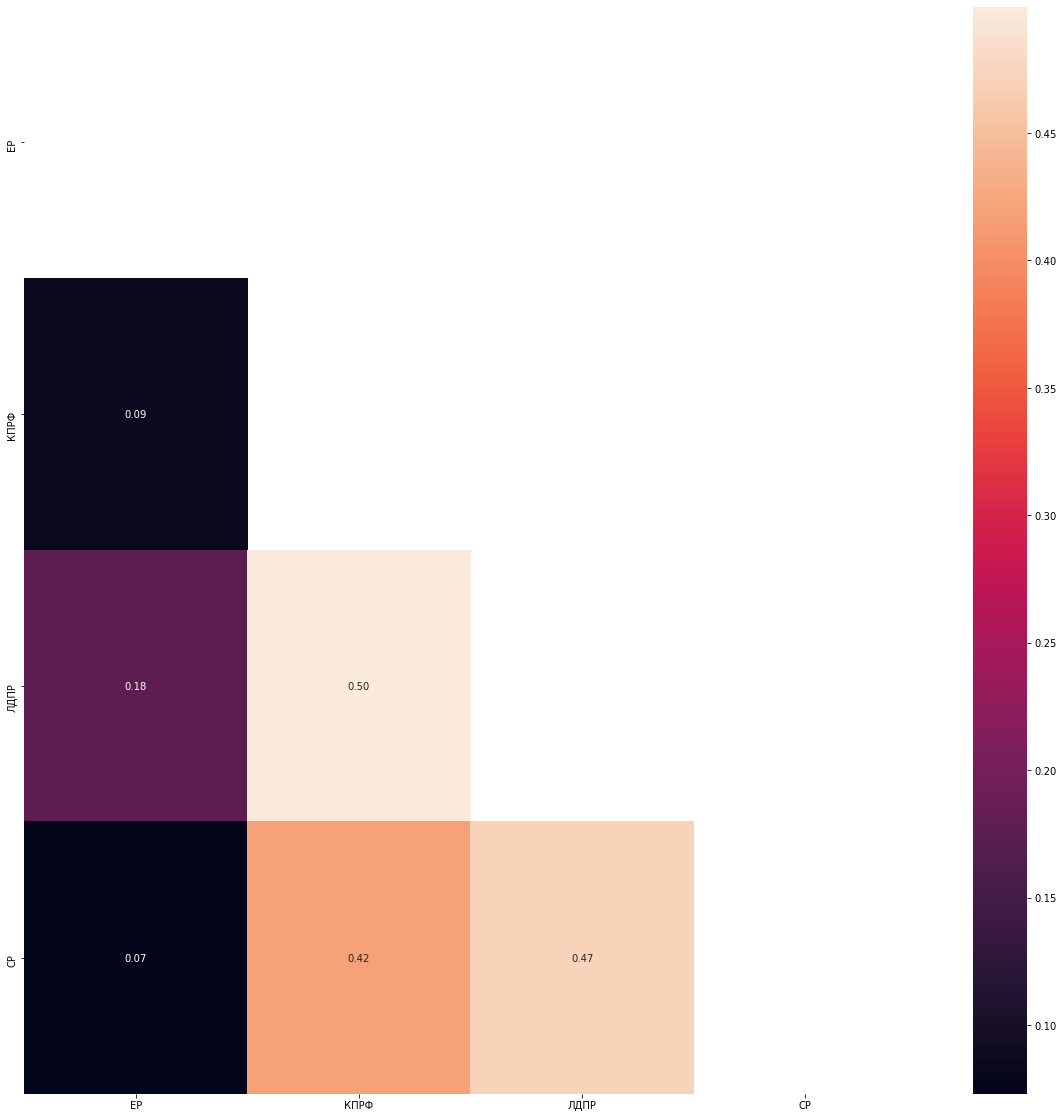

In [28]:
corr_func(df_p, figsize=(20,20))

In [29]:
corr_feature_detect(data=df_p, threshold=0, feature_name='Партия')

,Партия 1,Партия 2,corr
0,ЛДПР,КПРФ,0.499584
1,СР,ЛДПР,0.472906
2,СР,КПРФ,0.419545
3,ЛДПР,ЕР,0.175561
4,КПРФ,ЕР,0.085612
5,СР,ЕР,0.073079
